In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [8]:
df.sample(6)

,Survived,Age,Fare
195,1,58.0,146.5208
185,0,NaN,50.0000
659,0,58.0,113.2750
61,1,38.0,80.0000
581,1,39.0,110.8833
177,0,50.0,28.7125


In [9]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [10]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.8, random_state=1)

In [15]:
X_train['Age_Imputed']=X_train['Age']
X_test['Age_Imputed']=X_test['Age']


In [17]:
#Handling Missing values
X_train['Age_Imputed'][X_train['Age_Imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_Imputed'][X_train['Age_Imputed'].isnull()]=X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [19]:
X_train.sample(6)

,Age,Fare,Age_Imputed
171,4.0,29.1250,4.0
126,NaN,7.7500,19.0
812,35.0,10.5000,35.0
492,55.0,30.5000,55.0
237,8.0,26.2500,8.0
552,NaN,7.8292,43.0


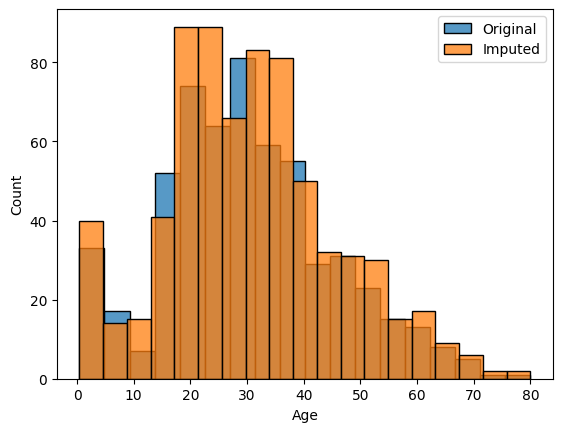

In [26]:
#EDA
sns.histplot(X_train['Age'], label='Original')
sns.histplot(X_train['Age_Imputed'], label='Imputed')

plt.legend()
plt.show()


In [27]:
print('Original Variance:', X_train['Age'].var())
print("Imputed Variance:", X_train['Age_Imputed'].var())

Original Variance: 220.7125508594779
Imputed Variance: 231.47234327008172


# For categorical dataset


In [30]:
data=pd.read_csv('train_1.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [32]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [33]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [35]:
X=data.drop(columns=['SalePrice'])
y=data['SalePrice']

In [36]:
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.8, random_state=3)

In [37]:
X_train['GarageQual_Imputed']=X_train['GarageQual']
X_test['GarageQual_Imputed']=X_test['GarageQual']


X_train['FireplaceQu_Imputed']=X_train['FireplaceQu']
X_test['FireplaceQu_Imputed']=X_test['FireplaceQu']



In [38]:
X_train

,FireplaceQu,GarageQual,GarageQual_Imputed,FireplaceQu_Imputed
727,NaN,TA,TA,NaN
328,NaN,TA,TA,NaN
958,NaN,TA,TA,NaN
126,TA,TA,TA,TA
1102,NaN,TA,TA,NaN
...,...,...,...,...
789,NaN,TA,TA,NaN
256,NaN,TA,TA,NaN
968,NaN,NaN,NaN,NaN
952,NaN,TA,TA,NaN


In [46]:
X_train['GarageQual_Imputed'][X_train['GarageQual_Imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_Imputed'][X_test['GarageQual_Imputed'].isnull()]=X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values



ValueError: cannot assign mismatch length to masked array

In [50]:
X_train['FireplaceQu_Imputed'][X_train['FireplaceQu_Imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_Imputed'][X_test['FireplaceQu_Imputed'].isnull()]=X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQU'].isnull().sum()).values


KeyError: 'FireplaceQU'

In [51]:
X_train

,FireplaceQu,GarageQual,GarageQual_Imputed,FireplaceQu_Imputed
727,NaN,TA,TA,TA
328,NaN,TA,TA,Gd
958,NaN,TA,TA,TA
126,TA,TA,TA,TA
1102,NaN,TA,TA,TA
...,...,...,...,...
789,NaN,TA,TA,Po
256,NaN,TA,TA,Gd
968,NaN,NaN,TA,TA
952,NaN,TA,TA,Gd


In [57]:
temp=pd.concat(
    [
        X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_Imputed'].value_counts()/len(X_train)
    ], axis=1
)
temp.columns=['Original', 'Imputed']



In [58]:
temp

,Original,Imputed
TA,0.951220,0.952055
Fa,0.037037,0.035959
Gd,0.008130,0.008562
Ex,0.001807,0.001712
Po,0.001807,0.001712
